In [7]:
from neo4j import GraphDatabase
from pandas import DataFrame
conn = GraphDatabase.driver(uri="bolt://localhost:7687", auth=("neo4j", "password"))
session = conn.session()

In [8]:
# test retrieve Resident
query = 'MATCH (n:Resident) return n.id, n.resident_name limit 100'
result = session.run(query)
dtf_data = DataFrame([dict(r) for r in result])
dtf_data.sample(10)

,n.id,n.resident_name
87,None,resident_name_88
31,None,resident_name_32
94,None,resident_name_95
8,None,resident_name_9
2,None,resident_name_3
26,None,resident_name_27
88,None,resident_name_89
34,None,resident_name_35
89,None,resident_name_90
7,None,resident_name_414


In [37]:
# Who has a sick person potentially infected
query = 'match (r:Resident {status:"Sick"}) with r limit 1 match (r)--(v1:Visit)--(pl:Place)--(v2:Visit)--(p2:Resident {status:"Healthy"}) return r.resident_name as Spreader, v1.entry_time as SpreaderStarttime, v2.exit_time as SpreaderEndtime, pl.place_name as PlaceVisited, p2.place_name as Target, v2.entry_time as TargetStarttime, v2.exit_time as TargetEndttime'  
result = session.run(query)
dtf_data = DataFrame([dict(r) for r in result])
dtf_data.sample(200)

,Spreader,SpreaderStarttime,SpreaderEndtime,PlaceVisited,Target,TargetStarttime,TargetEndttime
320,resident_name_148,2021-04-02T12:15:00.000000000+00:00,2021-03-31T19:58:00.000000000+00:00,Blk 226H Ang Mo Kio Street 22,None,2021-03-31T19:27:00.000000000+00:00,2021-03-31T19:58:00.000000000+00:00
245,resident_name_148,2021-03-30T12:43:00.000000000+00:00,2021-03-27T13:04:00.000000000+00:00,GAY WORLD HOTEL,None,2021-03-27T11:46:00.000000000+00:00,2021-03-27T13:04:00.000000000+00:00
441,resident_name_148,2021-04-06T16:19:00.000000000+00:00,2021-03-31T15:02:00.000000000+00:00,FUJI XEROX TOWERS,None,2021-03-31T14:36:00.000000000+00:00,2021-03-31T15:02:00.000000000+00:00
495,resident_name_148,2021-04-10T08:31:00.000000000+00:00,2021-04-17T11:19:00.000000000+00:00,Blk 527 Ang Mo Kio Ave 10,None,2021-04-17T10:40:00.000000000+00:00,2021-04-17T11:19:00.000000000+00:00
427,resident_name_148,2021-04-06T16:19:00.000000000+00:00,2021-04-18T12:44:00.000000000+00:00,FUJI XEROX TOWERS,None,2021-04-18T11:27:00.000000000+00:00,2021-04-18T12:44:00.000000000+00:00
...,...,...,...,...,...,...,...
509,resident_name_148,2021-04-10T08:31:00.000000000+00:00,2021-04-09T13:50:00.000000000+00:00,Blk 527 Ang Mo Kio Ave 10,None,2021-04-09T12:14:00.000000000+00:00,2021-04-09T13:50:00.000000000+00:00
454,resident_name_148,2021-04-08T17:06:00.000000000+00:00,2021-04-16T20:44:00.000000000+00:00,CANOSSIAN SCHOOL,None,2021-04-16T18:57:00.000000000+00:00,2021-04-16T20:44:00.000000000+00:00
281,resident_name_148,2021-04-02T09:57:00.000000000+00:00,2021-04-20T15:03:00.000000000+00:00,JUYING SECONDARY SCHOOL,None,2021-04-20T13:39:00.000000000+00:00,2021-04-20T15:03:00.000000000+00:00
355,resident_name_148,2021-04-03T16:45:00.000000000+00:00,2021-04-20T09:33:00.000000000+00:00,SAINT HILDAS PRIMARY SCHOOL (U/C),None,2021-04-20T08:23:00.000000000+00:00,2021-04-20T09:33:00.000000000+00:00


In [38]:
# Find sick person that has visited places since being infected
query = 'match (r:Resident {status:"Sick"})-[visited]->(pl:Place) where r.confirmed_time < visited.entry_time return r.resident_name as Resident, pl.place_name as Place, visited.entry_time as Entry_time, visited.exit_time as Exit_time'  
result = session.run(query)
dtf_data = DataFrame([dict(r) for r in result])
dtf_data.sample(200)

,Resident,Place,Entry_time,Exit_time
1039,resident_name_967,APSN (KATONG SCHOOL),2021-04-16T09:41:00.000000000+00:00,2021-04-16T10:29:00.000000000+00:00
49,resident_name_890,Blk 210 Toa Payoh Lorong 8,2021-04-18T15:56:00.000000000+00:00,2021-04-18T17:04:00.000000000+00:00
1618,resident_name_225,REGENT SECONDARY SCHOOL,2021-04-18T12:29:00.000000000+00:00,2021-04-18T13:44:00.000000000+00:00
1600,resident_name_582,PCF SPARKLETOTS PRESCHOOL @ LIMBANG BLK 786 (KN),2021-04-16T18:51:00.000000000+00:00,2021-04-16T21:03:00.000000000+00:00
317,resident_name_1247,GALAXY TOWERS,2021-04-15T16:33:00.000000000+00:00,2021-04-15T17:08:00.000000000+00:00
...,...,...,...,...
507,resident_name_183,HOTEL KAI,2021-04-15T09:58:00.000000000+00:00,2021-04-15T11:11:00.000000000+00:00
1736,resident_name_876,PCF SPARKLETOTS PRESCHOOL @ NEE SOON EAST BLK ...,2021-04-15T17:41:00.000000000+00:00,2021-04-15T19:10:00.000000000+00:00
871,resident_name_85,ANGLO-CHINESE SCHOOL (BARKER ROAD),2021-04-18T16:35:00.000000000+00:00,2021-04-18T16:26:00.000000000+00:00
491,resident_name_400,THE QUAY HOTEL WEST COAST,2021-04-16T13:35:00.000000000+00:00,2021-04-16T13:40:00.000000000+00:00


In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot daily confirm case
query = 'match (r:Resident {status: "Sick"}) return r.confirmed_time as date , count(r) as dailyConfirmed'  
result = session.run(query)
dtf_data = pd.DataFrame([dict(r) for r in result])
print(dtf_data)


                                   date  dailyConfirmed
0   2021-04-16T00:00:00.000000000+00:00              33
1   2021-04-19T00:00:00.000000000+00:00              20
2   2021-04-18T00:00:00.000000000+00:00              23
3   2021-04-20T00:00:00.000000000+00:00              14
4   2021-04-15T00:00:00.000000000+00:00              15
5   2021-04-14T00:00:00.000000000+00:00              27
6   2021-04-17T00:00:00.000000000+00:00              39
7   2021-04-12T00:00:00.000000000+00:00              25
8   2021-04-13T00:00:00.000000000+00:00              15
9   2021-04-11T00:00:00.000000000+00:00              10
10  2021-04-09T00:00:00.000000000+00:00              26
11  2021-04-10T00:00:00.000000000+00:00              32


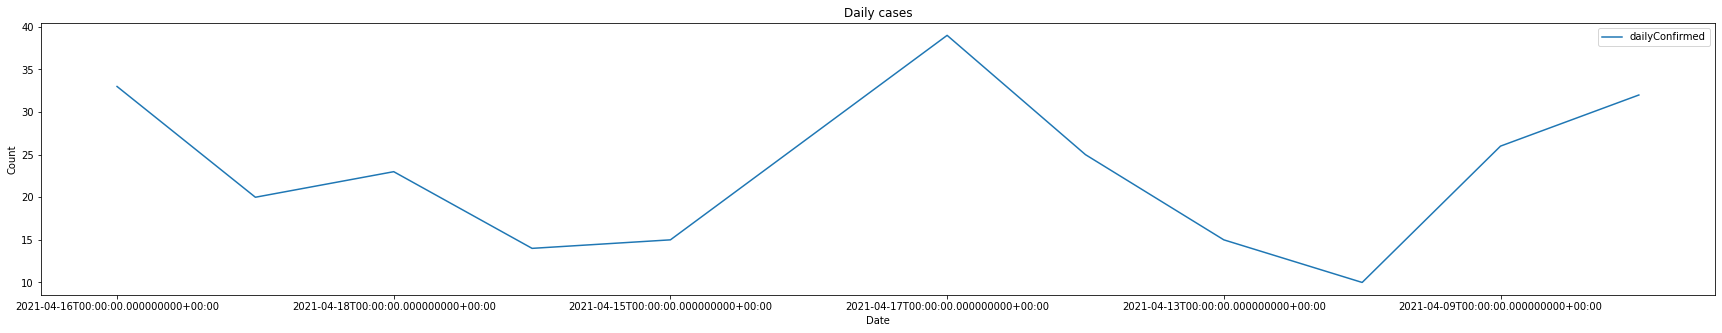

In [70]:
dtf_data.plot(x="date", y="dailyConfirmed")
plt.title("Daily cases")
plt.xlabel("Date")
plt.ylabel("Count")
plt.rcParams["figure.figsize"] = (30,50)

In [55]:
# Find Community
query = 'match (p1:Resident)-[v:Visit]->(pl:Place), (p1)-[m:MEETS]->(p2:Resident) return distinct p1.louvain as Community_id'  
result = session.run(query)
dtf_data = DataFrame([dict(r) for r in result])
dtf_data.sample(200)

,Community_id
19,1861
338,1600
341,1663
82,1377
15,1783
...,...
146,1759
237,738
255,1900
312,1612


In [57]:
# Find Community
query = 'match (p1:Resident {louvain: 1603})-[v:Visit]->(pl:Place), (p1)-[m:MEETS]->(p2:Resident) return p1.louvain as Community_id, pl.place_name, count(p1)'  
result = session.run(query)
dtf_data = DataFrame([dict(r) for r in result])
dtf_data.sample(200)

,Community_id,pl.place_name,count(p1)
378,1603,SINGAPORE MANAGEMENT UNIVERSITY (SCHOOL OF LAW),1
305,1603,PCF SPARKLETOTS PRESCHOOL @ SENGKANG WEST BLK ...,1
176,1603,FRAGRANCE HOTEL - OASIS,1
17,1603,OCBC PIONEER MALL,4
56,1603,MARKET & HAWKER CENTRE (BLK 210 TOA PAYOH LORO...,1
...,...,...,...
42,1603,PCF SPARKLETOTS PRESCHOOL @ PUNGGOL COAST BLK ...,7
58,1603,LICDO @ BB PRESCHOOL TEAM PTE. LTD.,1
76,1603,LION TOWERS,8
289,1603,MIN WAH HOTEL,1
